In [1]:
import pandas as pd 
data=pd.read_csv("hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [2]:
resort_hotel = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city_hotel = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]


In [3]:
city_hotel["is_canceled"].count()

46228

we can understand that in initial months and last months the booking are decreasing so in those months we can give some offers to increase the number of customers

C:\Users\user\AppData\Local\Temp\ipykernel_30500\2237723207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["arrival_date_month"] = pd.Categorical(
C:\Users\user\AppData\Local\Temp\ipykernel_30500\2237723207.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = filtered_data.groupby(
C:\Users\user\AppData\Local\Temp\ipykernel_30500\2237723207.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotati

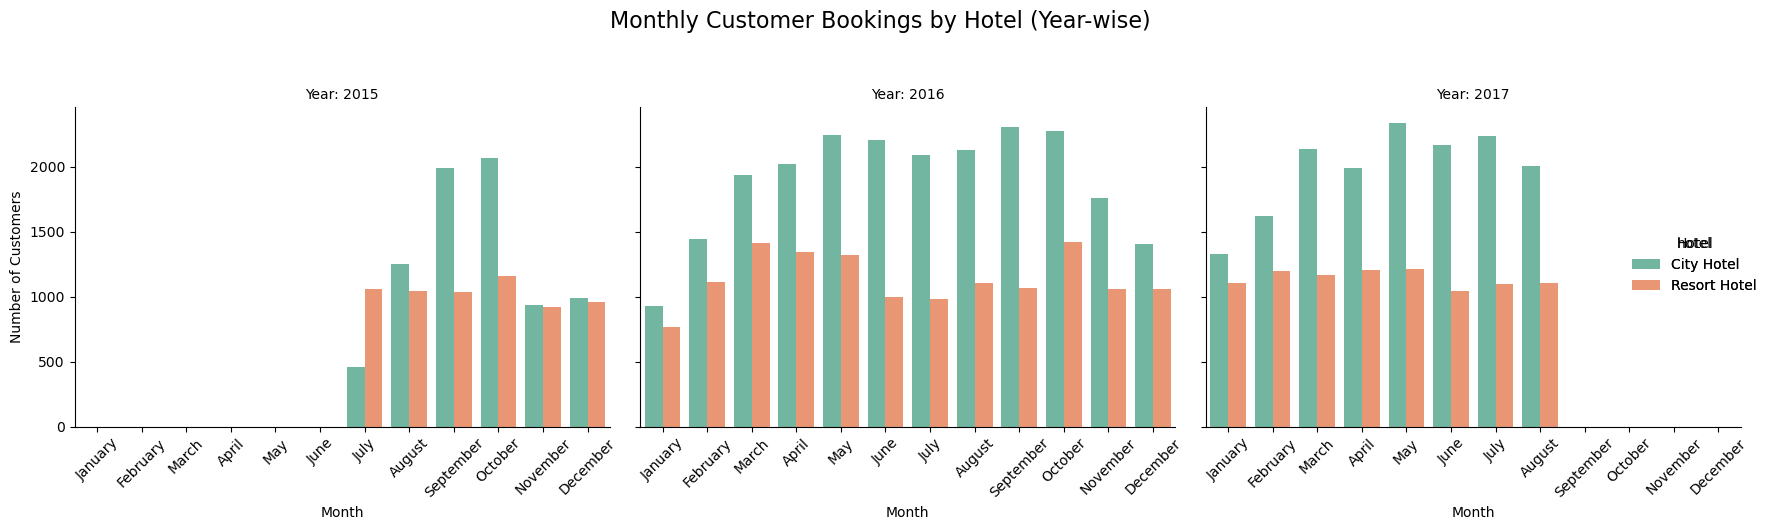

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


filtered_data = data[data["is_canceled"] == 0]

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']



filtered_data["arrival_date_month"] = pd.Categorical(
    filtered_data["arrival_date_month"],
    categories=month_order,
    ordered=True
)


monthly_counts = filtered_data.groupby(
    ["arrival_date_year", "arrival_date_month", "hotel"]
).size().reset_index(name="bookings")

import seaborn as sns
import matplotlib.pyplot as plt


g = sns.catplot(
    data=monthly_counts,
    kind="bar",
    x="arrival_date_month",
    y="bookings",
    hue="hotel",
    col="arrival_date_year",   
                    
    height=5,
    
    palette="Set2"
)


g.set_axis_labels("Month", "Number of Customers")
g.set_titles("Year: {col_name}")
g.add_legend(title="Hotel")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

g.fig.suptitle("Monthly Customer Bookings by Hotel (Year-wise)", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



how lead time affects cancellation ? 

C:\Users\user\AppData\Local\Temp\ipykernel_30500\4026966683.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="is_canceled", y="lead_time", data=data, palette="cool", inner="box")


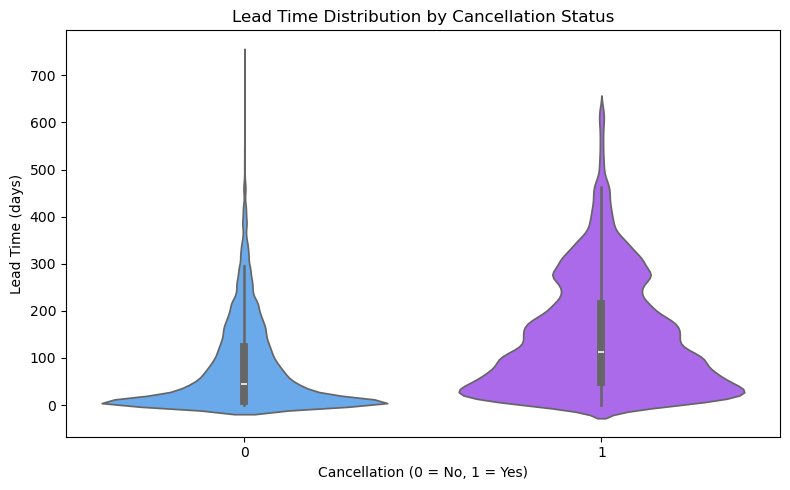

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("hotel_bookings.csv")

plt.figure(figsize=(8,5))
sns.violinplot(x="is_canceled", y="lead_time", data=data, palette="cool", inner="box")
plt.title("Lead Time Distribution by Cancellation Status")
plt.xlabel("Cancellation (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()



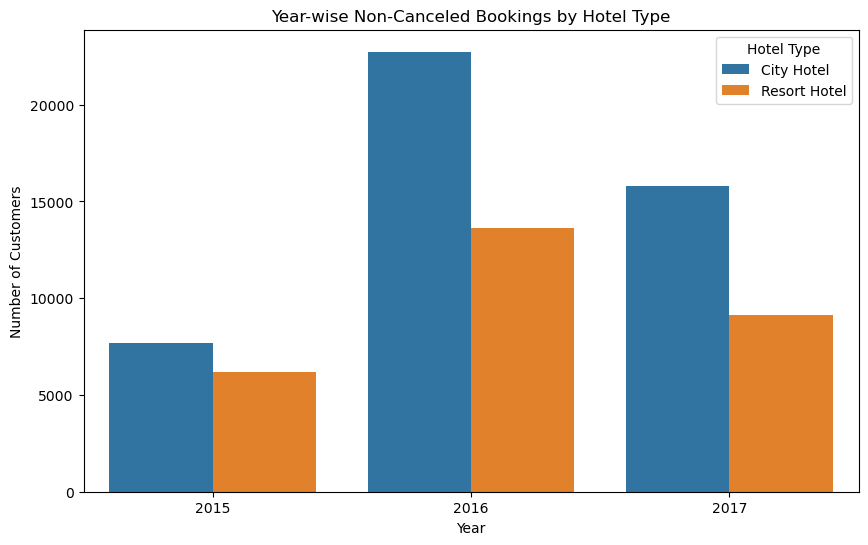

In [6]:
#this will show which hotel get higher customer year wise  so that we can use the same staregy to increase the customer rate again
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("hotel_bookings.csv")

non_canceled = data[data["is_canceled"] == 0]

yearly_counts = non_canceled.groupby(["arrival_date_year", "hotel"]).size().reset_index(name="bookings")

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_counts, x="arrival_date_year", y="bookings", hue="hotel")
plt.title("Year-wise Non-Canceled Bookings by Hotel Type")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.legend(title="Hotel Type")
plt.show()


to increase the count of people the hotel should start some weekend offers like for family 

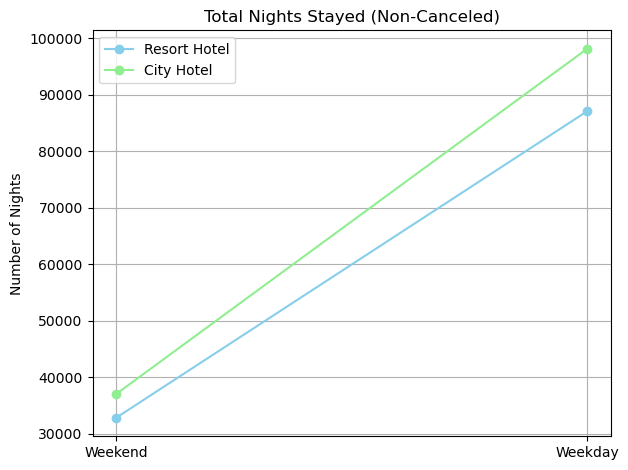

In [10]:
import matplotlib.pyplot as plt


non_canceled = data[data["is_canceled"] == 0]

resort_weekend = non_canceled[non_canceled["hotel"] == "Resort Hotel"]["stays_in_weekend_nights"].sum()
resort_weekday = non_canceled[non_canceled["hotel"] == "Resort Hotel"]["stays_in_week_nights"].sum()

city_weekend = non_canceled[non_canceled["hotel"] == "City Hotel"]["stays_in_weekend_nights"].sum()
city_weekday = non_canceled[non_canceled["hotel"] == "City Hotel"]["stays_in_week_nights"].sum()
labels = ["Weekend", "Weekday"]
resort = [resort_weekend, resort_weekday]
city = [city_weekend, city_weekday]


plt.plot(labels, resort, marker='o', label='Resort Hotel', color='skyblue')
plt.plot(labels, city, marker='o', label='City Hotel', color='lightgreen')

plt.title("Total Nights Stayed (Non-Canceled)")
plt.ylabel("Number of Nights")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Re-evaluate pricing, or bundle meals with discounts (e.g., “Stay 3 nights, get full board for the price of half”).

increase the price of most wanted  meal and decrese of lower one and include some deals 

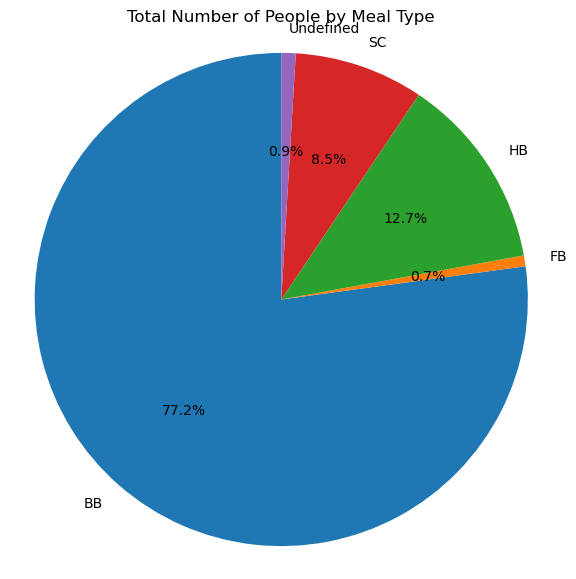

In [12]:
import matplotlib.pyplot as plt
data["total_people"] = data["adults"] + data["children"].fillna(0) + data["babies"]
meal_summary = data.groupby("meal")["total_people"].sum()

plt.figure(figsize=(7, 7))
plt.pie(meal_summary, 
        labels=meal_summary.index, 
        autopct='%1.1f%%',
        startangle=90)

plt.title("Total Number of People by Meal Type")
plt.axis('equal')  
plt.show()


to understand the most liked room type

C:\Users\user\AppData\Local\Temp\ipykernel_30500\2013044289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_counts.index, y=room_counts.values, palette='viridis')


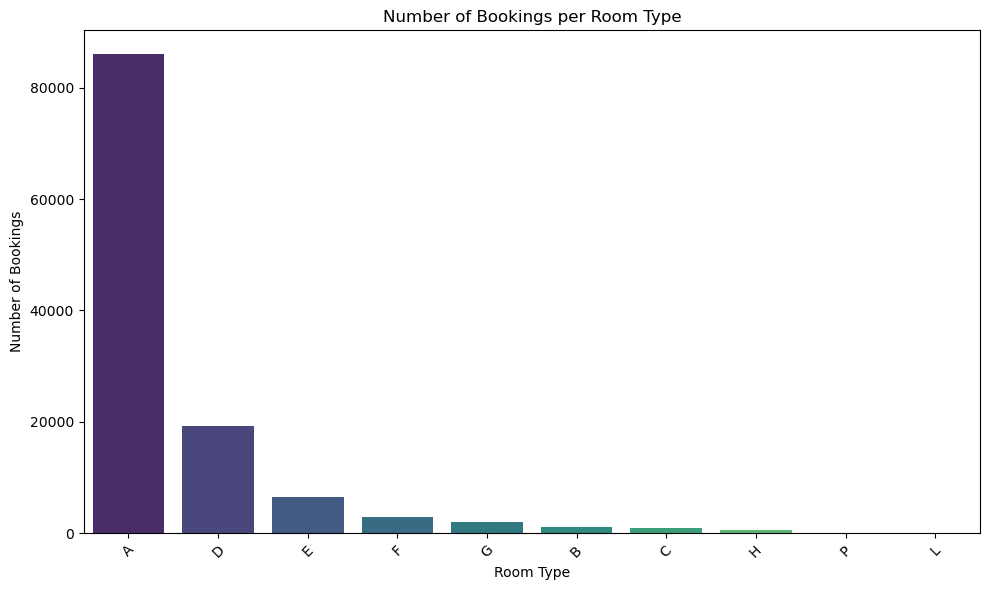

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('hotel_bookings.csv')

# Count the number of bookings per room type
room_counts = data['reserved_room_type'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=room_counts.index, y=room_counts.values, palette='viridis')
plt.title('Number of Bookings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()